In [1]:
import random
import sys
sys.path.append("../../../")
from simulation_classes.eta.car import Cars
from simulation_classes.eta.CWPTable import CWPTable
from simulation_classes.eta.SimulationClass import ETASimulation
sys.path.append("../")
from utils import find_delta_v_list, find_delta_x_list

""" 初期設定（独立変数群）"""
CAR_NUM = 15 #時間窓内の車の総数
START_TIME = 0
TOTAL_LENGTH = 2000 # 入り口から出口までの距離 [m]
WAYPOINTS_NUM = 10 #constrained way pointの数
ORIFITH_LENGTH = 5 # 整流区間長さ. 最後のCWPのindexで指定。
MEAN_SPEED = 20 # 秒速[m/s]として定義
SCALE_FACTOR = 20 #シミュレーション上で距離を変換するための係数
TIME_STEP = 1
TOTAL_TIME = 150
V_MAX = 40

# ETAに関する設定
GLOBAL_TIME_WINDOW = 100  # Strategic Phaseでの時間幅
BATCH_NUM = 1
WINDOW_SIZE = (GLOBAL_TIME_WINDOW / BATCH_NUM)
DESIRED_TTC = 5 # 目標とする車間時間 [s]
DESIRED_SPEED = 21 # 目標とする出口速度 [m/s]

# 車のパラメータ
MAX_ACC_REAL_WORLD = 2 # 0.2Gくらい
MIN_ACC_REAL_WORLD = 2 # 0.5Gくらい
FRONT_BRAKE_REAL_WORLD = 8 # 0.8Gくらい

helly_params = {
    "max_accel":  MAX_ACC_REAL_WORLD,
    "min_accel": 2,
    "front_car_brake":FRONT_BRAKE_REAL_WORLD / SCALE_FACTOR,
    "rear_brake_acc":2,
    "response_time":0.5, #秒で入れる,
    "lambda_1": 0.2,
    "lambda_2": 0.4,
    "d": 0.499,
    "T_des": 1.1,
    "isRss":False
  }

simulation_params = {"TOTAL_TIME": TOTAL_TIME, "TIME_STEP":TIME_STEP}
group_id = 0

WAYPOINTS = [{"waypoint_idx": i, "x": TOTAL_LENGTH / WAYPOINTS_NUM * (i)} for i in range(WAYPOINTS_NUM+1)]


In [2]:
arrival_times = [18.41537233131618, 51.66619365292286, 75.01288098255446, 87.03040350655053, 100.97323869660035]
paramSet = {'algorithm':'CONTROLLED', 'window': 150, 'car_num': 5, 'TTC': 3}
CARS = [Cars(arrival_time=time, index=index, mean_speed=MEAN_SPEED, \
      helly_params=helly_params, group_id=group_id, order_in_group=index)
      for index, time in enumerate(arrival_times)]
global_params = {"WINDOW_SIZE":WINDOW_SIZE, "START_TIME":START_TIME, "DESIRED_TTC":paramSet["TTC"], \
                 "ORIFITH_EXIT_INDEX":ORIFITH_LENGTH, "DESIRED_SPEED": DESIRED_SPEED, "V_MAX":V_MAX, "CAR_NUM": paramSet["car_num"]}


cwp_table_controlled = CWPTable(waypoints = WAYPOINTS, algorithm = "CONTROLLED", \
             global_params = global_params, )

# 続いてシミュレーションオブジェクトを初期化
eta_simulation_controlled = ETASimulation(CARS=CARS, CWPTable=cwp_table_controlled, simulation_params=simulation_params)

# 実行
eta_simulation_controlled.conduct_simulation()

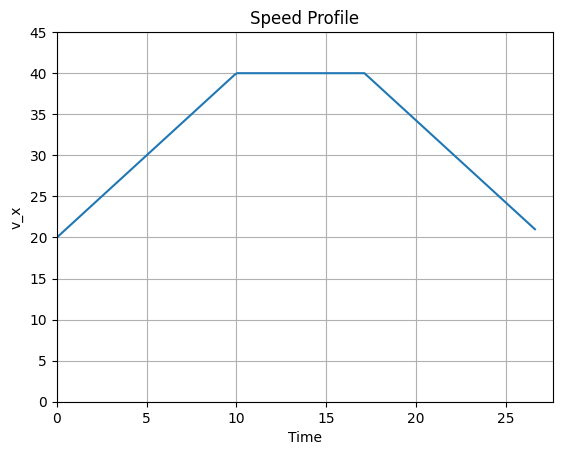

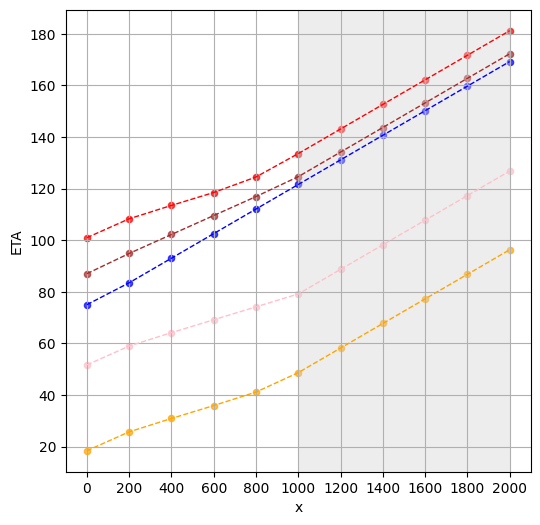

In [3]:
cwp_table_controlled = eta_simulation_controlled.cwp_table
cars = eta_simulation_controlled.CARS
car = cars[4].plot_speed_profile()
cwp_table_controlled.plot()
